## Prever Vendas das lojas ROSSMANN

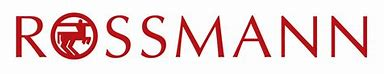




Rossmann opera mais de 3.000 drogarias em 7 países europeus. Atualmente, os gerentes de loja da Rossmann têm a tarefa de prever suas vendas diárias com até 2 mês de antecedência. As vendas da loja são influenciadas por muitos fatores, incluindo promoções, competição, feriados escolares e estaduais, sazonalidade e localidade. 

Objetivo é ajudar os gerentes prever suas vendas, para isso vou utilizar o profeta do face book e realizar uma análise exploratória dos dados tratar outliers, lidar com valores ausentes, correlação com conjunto de dados store unido.

- Base de dados da Rossmann: https://www.kaggle.com/c/rossmann-store-sales/data



## Dicionário de Variáveis
Esse arquivo csv possui 9 colunas. São elas:
* Id - um Id que representa um (Store, Date) duple dentro do conjunto de teste
* Loja - um ID único para cada loja
* Vendas - o volume de negócios em qualquer dia (isto é o que você está prevendo)
* Clientes - o número de clientes em um determinado dia
* Aberta - um indicador para saber se a loja estava aberta: 0 = fechada, 1 = aberta
* StateHoliday - indica um feriado estadual. Normalmente todas as lojas, com poucas exceções, fecham nos feriados estaduais. Observe que todas as escolas fecham nos feriados e finais de semana. a = feriado, b = feriado da Páscoa, c = Natal, 0 = Nenhum
* SchoolHoliday - indica se (loja, data) foi afetado pelo fechamento de escolas públicas
* StoreType  - diferencia entre 4 modelos de loja diferentes: a, b, c, d
* Sortimento - descreve um nível de sortimento: a = básico, b = extra, c = estendido
* CompetitionDistance - distância em metros até a loja concorrente mais próxima
* CompetitionOpenSince [Mês / Ano] - fornece o ano e mês aproximados em que o concorrente mais próximo foi aberto
* Promo - indica se uma loja está fazendo uma promoção naquele dia
* Promo2 - Promo2 é uma promoção contínua e consecutiva para algumas lojas: 0 = loja não participa, 1 = loja participa
* Promo2Since [Ano / Semana] - descreve o ano e a semana em que a loja começou a participar da Promo2
* PromoInterval - descreve os intervalos consecutivos em que a Promo2 é iniciada, nomeando os meses em que a promoção é reiniciada. Por exemplo, "fevereiro, maio, agosto, novembro" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para aquela loja

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#### Dados das vendas

In [2]:
# Carregando os dados no atributo
sales_train_df = pd.read_csv('/content/train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Verificar tamanho do Dataset
sales_train_df.shape

(1017209, 9)

In [4]:
#Visualizando o cabeçalho do Dataset 
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
#Visualizando o rodapé do Dataset 
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


Muito importante conhecer o começo e final do Dataset, pode perceber que temos dados no final do nosso dataset que tem números zeros. Neste tipo de negócio de vendas os zeros representa que não teve vendas as lojas não foram abertas.

In [6]:
#Aplicar estatistica nosso dataset 
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


#### Dados das lojas

In [7]:
#carregando os dados das lojas
store_info_df = pd.read_csv('/content/store.csv')

In [8]:
#visualizando o shape do dataset
store_info_df.shape

(1115, 10)

In [9]:
#visualizar o dataset loja
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Quando aplicando função info() nota-se que nos dados temos valores faltando na colunas 
CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear,PromoInterval

### Exploração dos dados

#### Dados das vendas

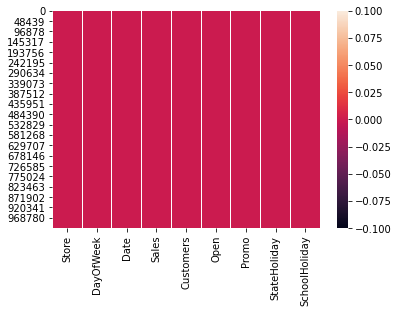

In [12]:
# Explorar a base de vendas se existe valores faltantes, vou utilizar o Heatmap para visualizar dados todas colunas do dataset se existe valores nulos.
sns.heatmap(sales_train_df.isnull());

In [13]:
# Nota-se que não existe nenhum valor nulos
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
# Precisamos separar o dataset os dados que teve vendas e sem vendas.
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [15]:
# Visualizar as quantidades de dias que lojas esteve fechados e abertos
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [16]:
# como temos 115 mil lojas fechados, neste caso precisamos fazer outra metrica para descobrir número de dias fechados.
# Para calculo utilizei total da base store_info é divide por 172.817
# Os dados que realmente importa para insight 844 mil lojas

172817 / len(store_info_df)

154.99282511210762

In [17]:
#separa o dataset que sales_train quando lojas esteve abertas
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [18]:
# os dataset já separados não preciso mais da coluna Open, por este motivo vou dropar coluna
sales_train_df.drop(['Open'], axis = 1, inplace=True)

In [19]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Uma métrica importante a sempre verificar ao olhar para uma distribuição é como a média se compara à mediana e quão próximos estão um do outro. Como vemos aqui, uma média de 6955 contra 6369 na mediana é um bom sinal de que não há valores extravagantes afetando a distribuição geral das vendas.

Dados das lojas

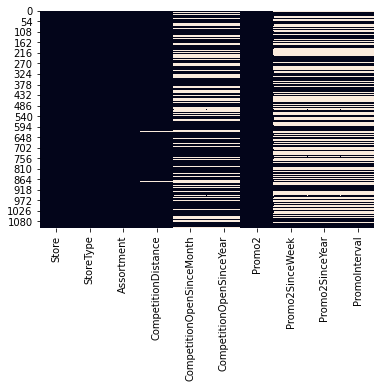

In [20]:
#visualizar os dados
sns.heatmap(store_info_df.isnull(), cbar=False);

In [21]:
# visualizar o os dados da CompetitionnDistance temos 3 lojas que estão vazias
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [22]:
# visualizar o os dados da CompetitionOpenSinceMonth temos 354 rigistros que estão valor faltando
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [23]:
# visualizar o os dados da CompetitionOpenSinceYear temos 354 rigistros que estão valor faltando
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
# visualizar o os dados da Promo2 temos 544 rigistros são lojas que não estão participando da Promoção adicional
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Recomendado quanto tem valores faltantes é tirar media para esse atributos, como são colunas de mes e anos de promoção não faz muito sentido tira a media para cada um deles.
Neste caso vou adicionar zeros para todos registro, pois uma loja fechada gera um lucro de 0.

In [25]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
    store_info_df[str].fillna(0, inplace=True)

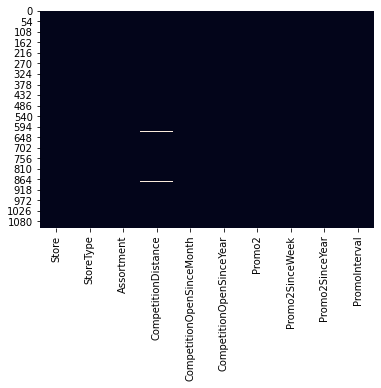

In [26]:
# Visualizar os dataset pode perceber que temos CompetitionDistance com valor nulos e aqui posso atributir a media das distancia de cada lojas.
sns.heatmap(store_info_df.isnull(), cbar = False);

#adicionando a média para coluna CompetitionDistance
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

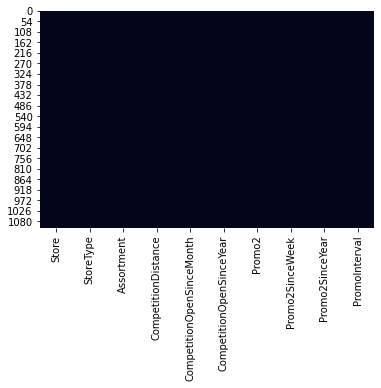

In [27]:
sns.heatmap(store_info_df.isnull(), cbar = False);

### União do dataset (vendas + lojas)

In [28]:
# Unir dados de vendas e lojas com função merge que é utilizado em SQL
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [29]:
# Visualizar o tamanho do dataset
sales_train_all_df.shape

(844392, 17)

In [30]:
# Visualizar o dataset com dados unidos
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844391,292,3,2013-01-02,5076,672,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


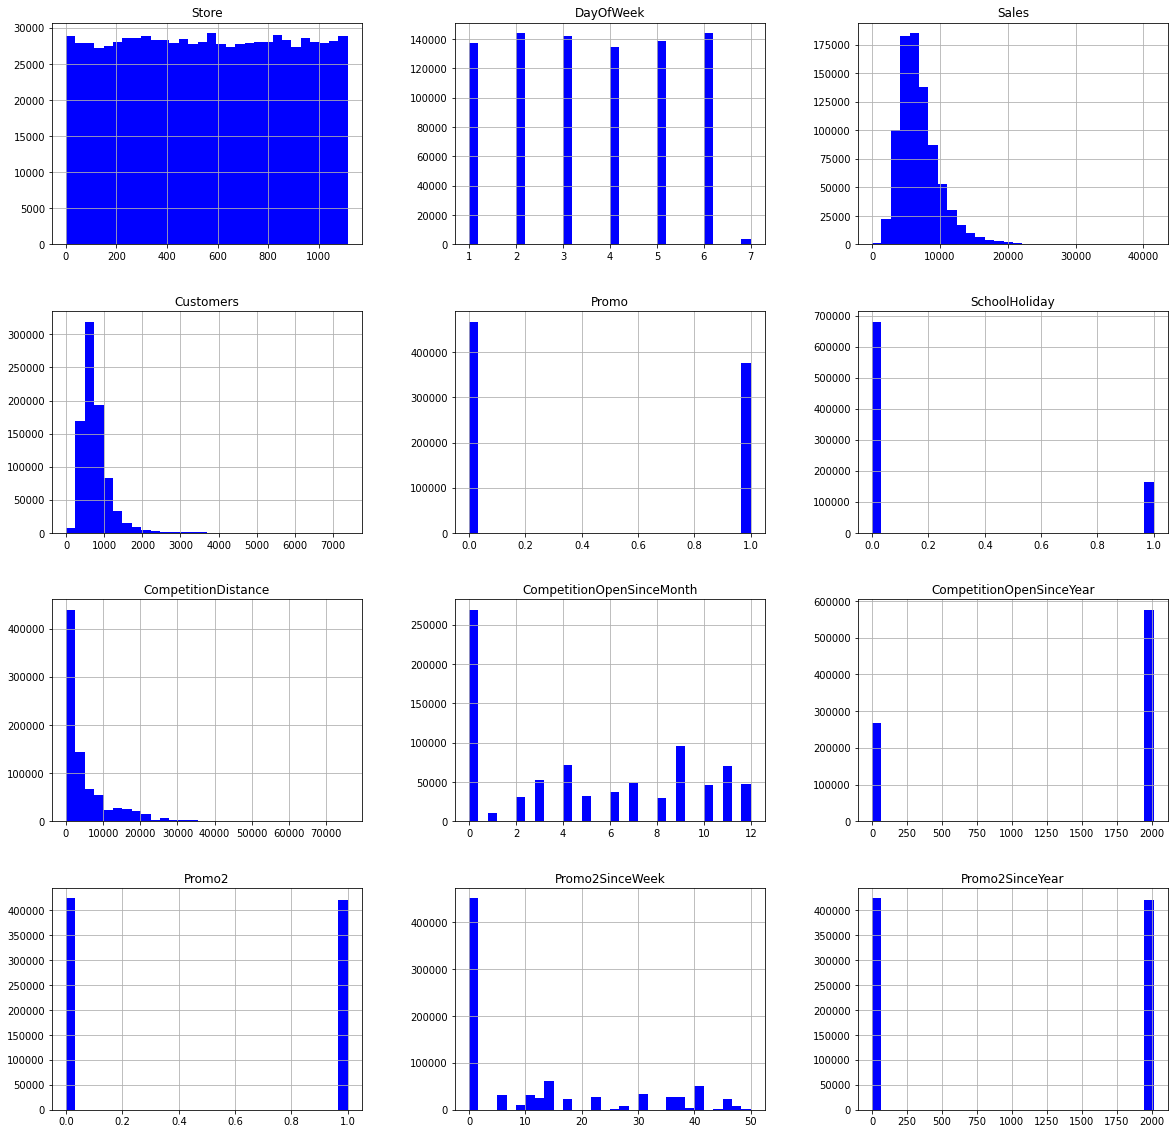

In [31]:
# insigths é visualizar a distribuição dos dados
sales_train_all_df.hist(bins = 30, figsize=(20,20), color = 'b');

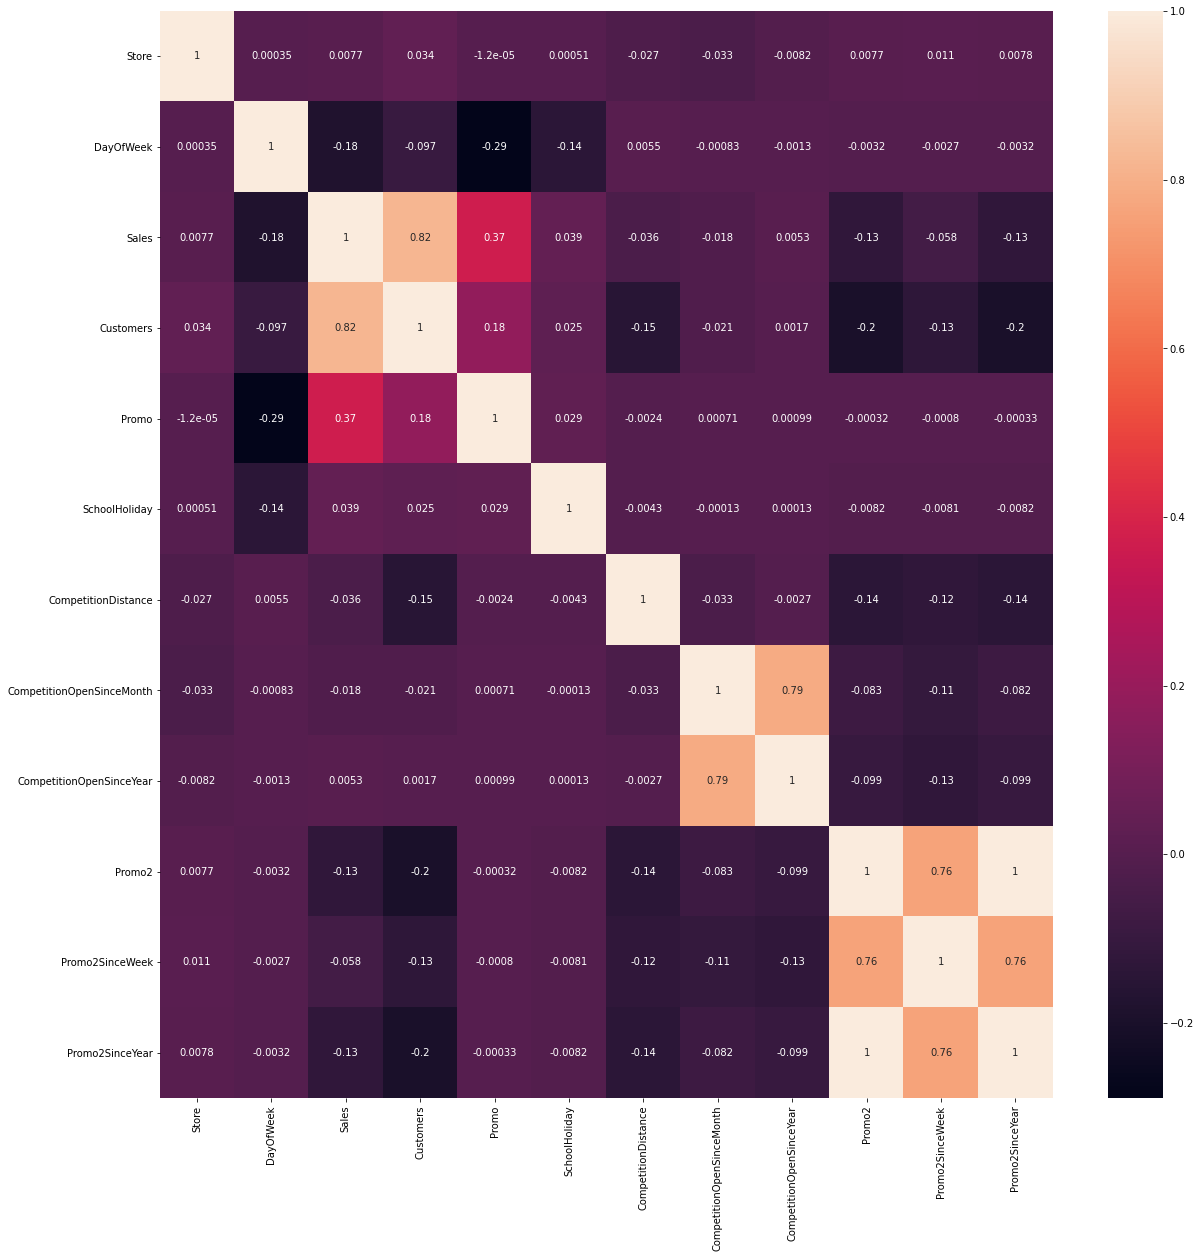

In [32]:
# visualizar correlação das variaveis 
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

Ao analise valores dos gráficos podemos ver padrões semelhantes com a coluna de clientes e a coluna de Vendas; na verdade, nosso fator de correlação de Pearson de 0,82 explica que há uma forte correlação positiva entre Vendas e Clientes. Em geral, quanto mais clientes você tiver em uma loja, maiores serão as vendas do dia. 

É interessante ver que Vendas por Cliente e Promoção (0,28) na verdade se correlacionam positivamente, já que executar uma promoção aumenta esse número. As vendas por cliente também se correlacionam com a distância da concorrência (0,21), de forma positiva, quanto maior a distância da concorrência, mais vendas por cliente fazemos, o que faz sentido, quanto mais nossa concorrência, mais monopolização a Rossman pode alcançar em a região.

In [33]:
# Converter o coluna ano para Datetime
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

# Converter o coluna mês,dia para Datetime
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

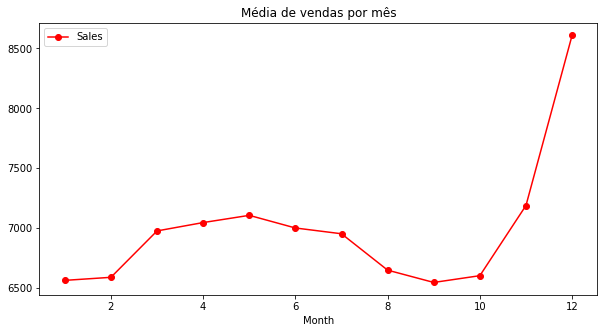

In [34]:
# Visualizar uma Média de Vendas por mês
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês');

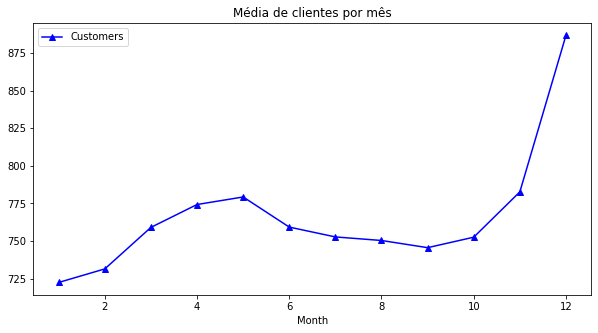

In [35]:
# Visualizar uma Média de Clientes por mês
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês');

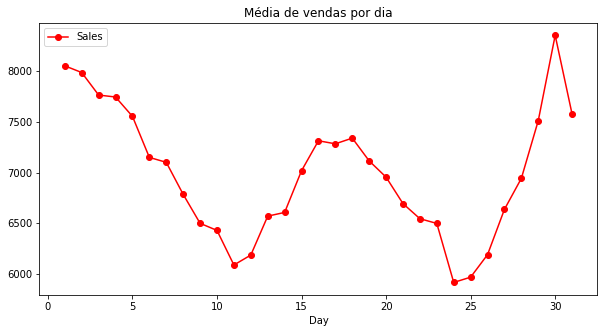

In [36]:
# Visualizar uma Média de Vendas por dia
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia');

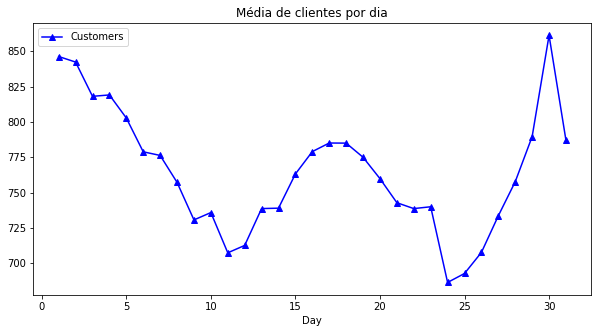

In [37]:
# Visualizar uma Média de Clientes por dia
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia');

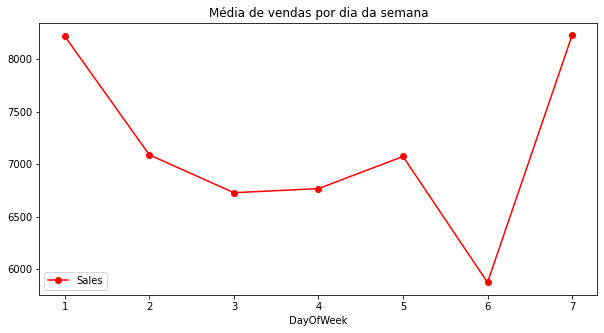

In [38]:
# Visualizar uma Média de Vendas Vendas por dia
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana');

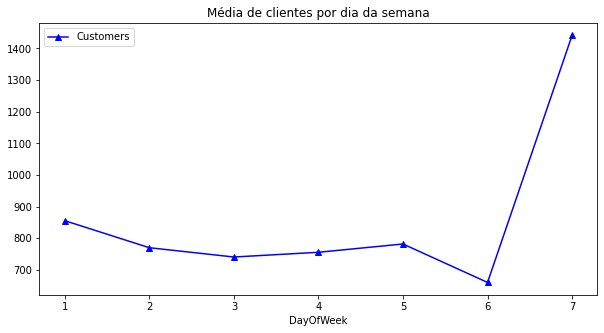

In [39]:
# Visualizar uma Média de Clientes por semana
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana');

Os sortimentos têm três tipos e cada loja tem um tipo e tipo de sortimento definidos:

a significa coisas básicas
b significa coisas extras
c significa coisas estendidas, portanto a maior variedade de produtos.

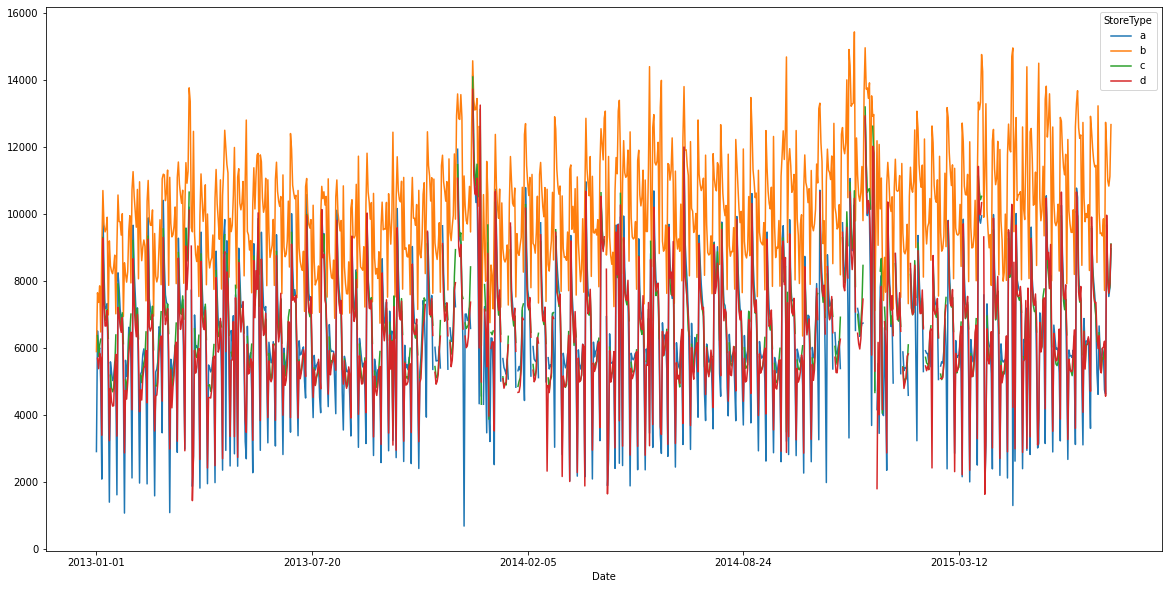

In [40]:
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax);

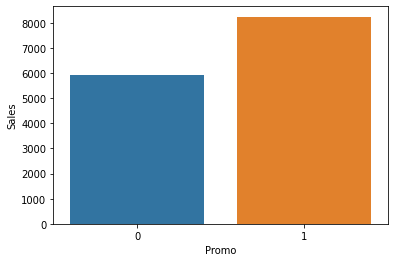

In [41]:
#Promoção por Vendas
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df);

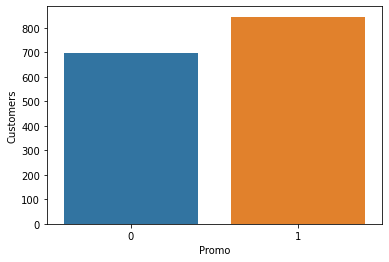

In [42]:
#Promoção por Clientes
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df);

## Aplicando o Facebook Prophet - parte 1

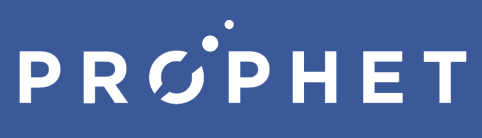

O pacote Prophet fornece parâmetros intuitivos que são fáceis de sintonizar. Mesmo alguém que não tem experiência em modelos de previsão pode usar isso para fazer previsões significativas para uma variedade de problemas em um cenário de negócios.

Utilizamos um modelo de série temporal decomposto com três componentes principais do modelo: tendência, sazonalidade e feriados. Eles são combinados na seguinte equação:

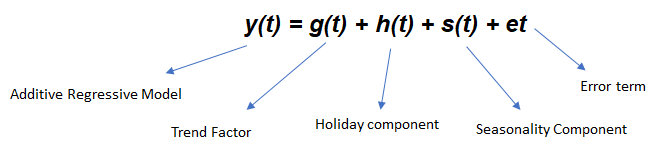

* g(t): curva de crescimento linear ou logística para modelagem de alterações não periódicas em séries temporentas
* s(t): alterações periódicas (por exemplo, sazonalidade semanal/anual)
* h(t): efeitos de feriados (usuário fornecido) com horários irregulares
* ΕT: o termo de erro explica quaisquer alterações incomuns não acomodadas pelo modelo


In [43]:
#Instalando facebookProphet
!pip install fbprophet

In [44]:
#importando Prophet
from fbprophet import Prophet

In [45]:
#Prophet requer que os nomes da variável na série temporal sejam:
#y - Alvo
#ds – Datação

def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


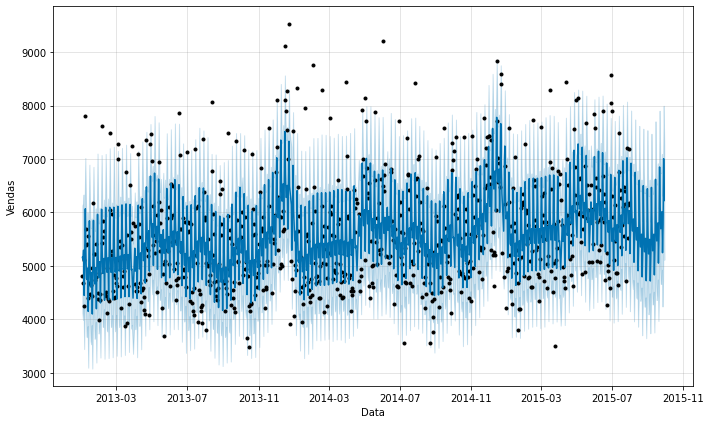

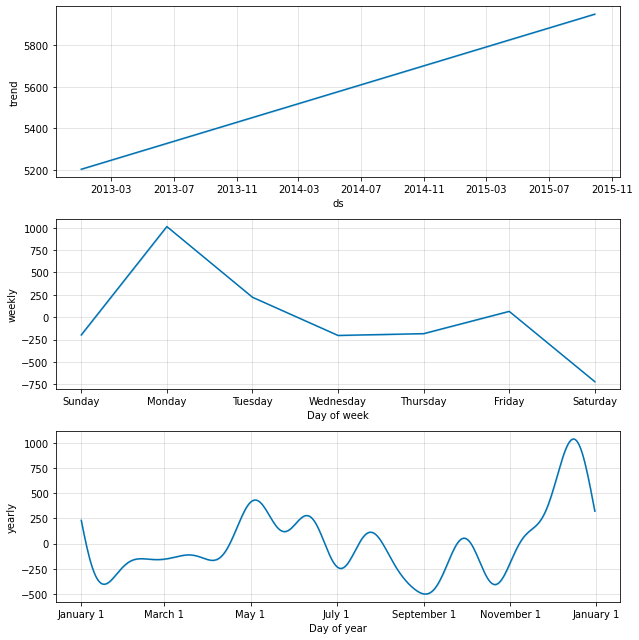

In [46]:
#aplicando predição no dataset
df = sales_prediction(10, sales_train_all_df, 60);

Quando aplicamos o prophet ele cria um gráficos com predição e analise exploratoria com tedência, sanzonalidade, dias da semana e ano.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


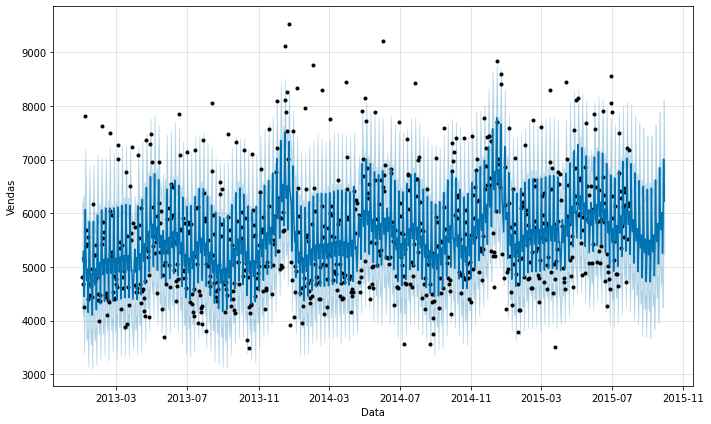

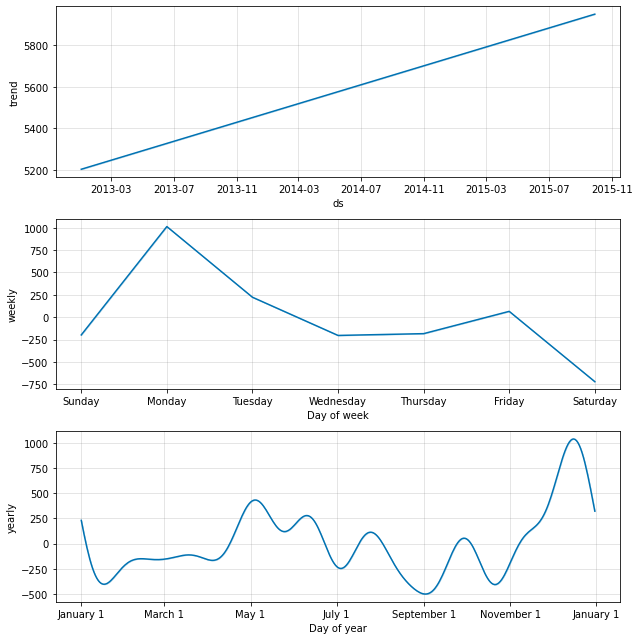

In [47]:
#Visualizando os insights é previsão de vendas
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60);

In [48]:
#Visualizanod o shape 
df_origin.shape, df_prediction.shape

((784, 2), (844, 19))

In [49]:
#Visualizando previsão de 60 dias 
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5904.754320,4173.075780,6331.392311,5904.754320,5904.754320,-673.734983,-673.734983,-673.734983,-719.174286,-719.174286,-719.174286,45.439303,45.439303,45.439303,0.0,0.0,0.0,5231.019337
785,2015-08-02,5905.498641,4691.619057,6791.955135,5905.498641,5905.498641,-172.385687,-172.385687,-172.385687,-197.423916,-197.423916,-197.423916,25.038229,25.038229,25.038229,0.0,0.0,0.0,5733.112954
786,2015-08-03,5906.242962,5821.058696,8018.036007,5906.242962,5906.242962,1015.917486,1015.917486,1015.917486,1013.040634,1013.040634,1013.040634,2.876853,2.876853,2.876853,0.0,0.0,0.0,6922.160448
787,2015-08-04,5906.987283,5059.894397,7153.134451,5906.987283,5906.987283,202.989916,202.989916,202.989916,223.673781,223.673781,223.673781,-20.683865,-20.683865,-20.683865,0.0,0.0,0.0,6109.977199
788,2015-08-05,5907.731604,4586.988243,6746.611725,5907.731604,5907.731604,-248.332224,-248.332224,-248.332224,-203.046067,-203.046067,-203.046067,-45.286157,-45.286157,-45.286157,0.0,0.0,0.0,5659.399381
789,2015-08-06,5908.475925,4599.632560,6663.683497,5908.475925,5908.475925,-253.597221,-253.597221,-253.597221,-183.012971,-183.012971,-183.012971,-70.584250,-70.584250,-70.584250,0.0,0.0,0.0,5654.878705
790,2015-08-07,5909.220246,4882.480466,6936.443908,5909.220246,5909.220246,-30.309420,-30.309420,-30.309420,65.942825,65.942825,65.942825,-96.252245,-96.252245,-96.252245,0.0,0.0,0.0,5878.910826
791,2015-08-08,5909.964567,4005.210604,6068.320673,5909.964564,5909.964567,-841.165148,-841.165148,-841.165148,-719.174286,-719.174286,-719.174286,-121.990862,-121.990862,-121.990862,0.0,0.0,0.0,5068.799419
792,2015-08-09,5910.708888,4465.781782,6694.532235,5910.708875,5910.708896,-344.956807,-344.956807,-344.956807,-197.423916,-197.423916,-197.423916,-147.532891,-147.532891,-147.532891,0.0,0.0,0.0,5565.752082
793,2015-08-10,5911.453209,5751.365018,7836.336087,5911.453187,5911.453227,840.393413,840.393413,840.393413,1013.040634,1013.040634,1013.040634,-172.647221,-172.647221,-172.647221,0.0,0.0,0.0,6751.846622


## Aplicando o Facebook Prophet  - parte 2 Feriados

Prophet permite que o analista forneça uma lista personalizada de eventos passados e futuros. Uma janela em torno desses dias são consideradas separadamente e parâmetros adicionais são montados para modelar o efeito de feriados e eventos.

* StateHoliday: Normalmente todas as lojas estão fechadas nesses feriados. As escolas estão fechadas nesses feriados e nos finais de semana. Legenda: a = public holiday, b = Páscoa, c = Natal, 0 = Nenhum feriado
* SchoolHoliday: indica se a loja foi afetada pelo feriado escolar

In [50]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [51]:
#criando dataset com dias dos feriados
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [52]:
#Dias dos feriados
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [53]:
#Quantidade de dias feriados no dataset
len(np.unique(school_holidays))

477

In [54]:
# filtrando os finais de semana a:Public holiday, b:Páscoa, c:Natal
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | 
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [55]:
# Criando um dataFrame separando ds e holiday
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [56]:
# Criando um dataFrame separando ds e school holiday
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [57]:
#concatenar os dados de state e school
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


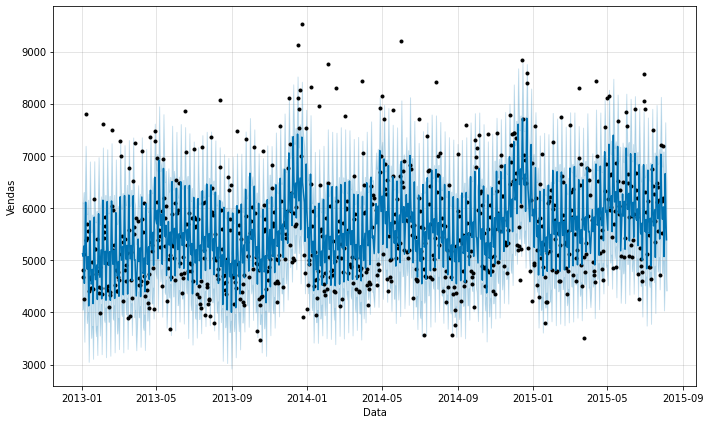

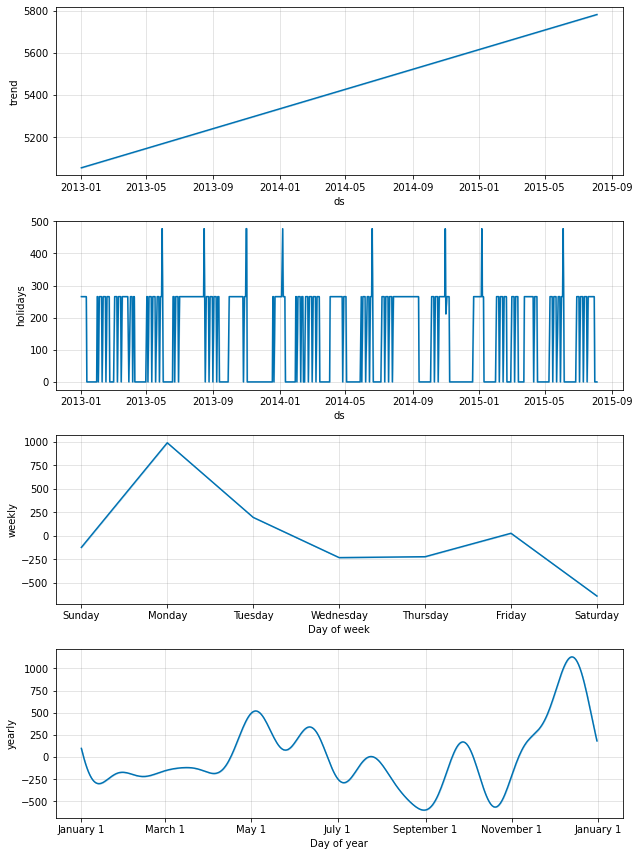

In [58]:
#Realizar as previsões 
df_original, df_prediction = sales_prediction(10, sales_train_all_df, school_state_holidays, 5);

In [59]:
#Visualizando o dataset
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,school_holiday,school_holiday_lower,school_holiday_upper,state_holiday,state_holiday_lower,state_holiday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5054.623831,4052.169691,6115.012080,5054.623831,5054.623831,68.739935,68.739935,68.739935,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,-231.157861,-231.157861,-231.157861,34.395656,34.395656,34.395656,0.0,0.0,0.0,5123.363767
1,2013-01-03,5055.395044,4082.163330,6103.271679,5055.395044,5055.395044,19.621422,19.621422,19.621422,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,-221.725581,-221.725581,-221.725581,-24.155137,-24.155137,-24.155137,0.0,0.0,0.0,5075.016466
2,2013-01-04,5056.166258,4247.354627,6305.497616,5056.166258,5056.166258,215.912637,215.912637,215.912637,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,27.862288,27.862288,27.862288,-77.451792,-77.451792,-77.451792,0.0,0.0,0.0,5272.078895
3,2013-01-05,5056.937471,3439.029233,5578.583252,5056.937471,5056.937471,-499.467146,-499.467146,-499.467146,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,-639.832929,-639.832929,-639.832929,-125.136358,-125.136358,-125.136358,0.0,0.0,0.0,4557.470324
4,2013-01-07,5058.479897,5058.554697,7192.134804,5058.479897,5058.479897,1053.239106,1053.239106,1053.239106,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,990.574123,990.574123,990.574123,-202.837157,-202.837157,-202.837157,0.0,0.0,0.0,6111.719002


Prophet é uma boa escolha para produzir previsões rápidas e precisas. Possui parâmetros intuitivos que podem ser ajustados por alguém que tem bom conhecimento de domínio, mas não possui habilidades técnicas na previsão de modelos.